# Pré-Processamento e Análise Exploratória (EDA): Projeto Bebo Bem - Gestão de Estoque

### *Importações e Leitura dos Dados*
---

In [149]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [150]:
mpl.style.use('ggplot')

In [151]:
dez = pd.read_csv('DEZ-2023.csv')
jan = pd.read_csv('JAN-2024.csv')
fev = pd.read_csv('FEV-2024.csv')
mar = pd.read_csv('MAR-2024.csv')
df = pd.concat([dez,jan,fev,mar], axis=0)
df.head(15)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,Histórico de estoque,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Data,Produto,NaN,Código,Movimentação,NaN,NaN,Qtd
2,NaN,31/12/2023 22:32,Lucky Strike Double Fresh,NaN,44,Venda,NaN,NaN,-1
3,NaN,31/12/2023 22:32,Carvão 2kg,NaN,134,Venda,NaN,NaN,-1
4,NaN,31/12/2023 22:12,Gelo de Coco,NaN,118,Venda,NaN,NaN,-4
5,NaN,31/12/2023 22:12,Itaipava Latão,NaN,28,Venda,NaN,NaN,-3
6,NaN,31/12/2023 22:12,Start 2L,NaN,71,Venda,NaN,NaN,-1
7,NaN,31/12/2023 21:56,Baton,NaN,95,Venda,NaN,NaN,-2
8,NaN,31/12/2023 21:56,Itaipava Latão,NaN,28,Venda,NaN,NaN,-3
9,NaN,31/12/2023 21:56,Pingo D'ouro 48g,NaN,178,Venda,NaN,NaN,-1


### *Pré-Processamento*
---

In [152]:
df.drop(['Unnamed: 0','Unnamed: 3','Unnamed: 6','Unnamed: 7'],axis=1,inplace=True)
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 4,Unnamed: 5,Unnamed: 8
0,Histórico de estoque,NaN,NaN,NaN,NaN
1,Data,Produto,Código,Movimentação,Qtd
2,31/12/2023 22:32,Lucky Strike Double Fresh,44,Venda,-1
3,31/12/2023 22:32,Carvão 2kg,134,Venda,-1
4,31/12/2023 22:12,Gelo de Coco,118,Venda,-4


In [153]:
df.rename(columns={
    'Unnamed: 1': 'Date',
    'Unnamed: 2': 'Product',
    'Unnamed: 4': 'Code',
    'Unnamed: 5': 'Flow',
    'Unnamed: 8': 'Amount',
}, inplace=True)

df

,Date,Product,Code,Flow,Amount
0,Histórico de estoque,NaN,NaN,NaN,NaN
1,Data,Produto,Código,Movimentação,Qtd
2,31/12/2023 22:32,Lucky Strike Double Fresh,44,Venda,-1
3,31/12/2023 22:32,Carvão 2kg,134,Venda,-1
4,31/12/2023 22:12,Gelo de Coco,118,Venda,-4
...,...,...,...,...,...
4279,01/03/2024 16:50,Rothmans Global,177,Venda,-1
4280,01/03/2024 16:49,Monster Mango Loco 473ml,74,Venda,-1
4281,01/03/2024 16:29,Zumbitos Requeijão 100g,191,Venda,-1
4282,NaN,NaN,NaN,NaN,NaN


In [154]:
df.dropna(axis=0, how='any',inplace=True)
df

,Date,Product,Code,Flow,Amount
1,Data,Produto,Código,Movimentação,Qtd
2,31/12/2023 22:32,Lucky Strike Double Fresh,44,Venda,-1
3,31/12/2023 22:32,Carvão 2kg,134,Venda,-1
4,31/12/2023 22:12,Gelo de Coco,118,Venda,-4
5,31/12/2023 22:12,Itaipava Latão,28,Venda,-3
...,...,...,...,...,...
4277,01/03/2024 17:05,Corote Limão,114,Venda,-1
4278,01/03/2024 17:04,Mentos,200,Venda,-2
4279,01/03/2024 16:50,Rothmans Global,177,Venda,-1
4280,01/03/2024 16:49,Monster Mango Loco 473ml,74,Venda,-1


In [155]:
df = df[df['Date'] != 'Data']
df = df[df['Product'] != 'Produto']
df = df[df['Code'] != 'Código']
df = df[df['Flow'] != 'Movimentação']
df = df[df['Amount'] != 'Qtd']

In [156]:
df.head()

,Date,Product,Code,Flow,Amount
2,31/12/2023 22:32,Lucky Strike Double Fresh,44,Venda,-1
3,31/12/2023 22:32,Carvão 2kg,134,Venda,-1
4,31/12/2023 22:12,Gelo de Coco,118,Venda,-4
5,31/12/2023 22:12,Itaipava Latão,28,Venda,-3
6,31/12/2023 22:12,Start 2L,71,Venda,-1


In [157]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M')
df.set_index('Date', inplace=True)

In [158]:
df.sort_values(by=['Date'], inplace=True)

In [159]:
df['Amount'] = pd.to_numeric(df['Amount'])
df['Amount'] = df['Amount'].apply(lambda row: abs(row))

In [160]:
df.head(15)

,Product,Code,Flow,Amount
Date,,,,
2023-12-04 20:08:00,Itaipava Latão,28,Venda,1
2023-12-04 20:20:00,Cigarro (Varejo),147,Venda,2
2023-12-04 20:20:00,Cheetos Onda 45g,90,Venda,1
2023-12-04 21:18:00,Cachaça Chora Rita,113,Venda,1
2023-12-04 21:18:00,Corote Limão,114,Venda,1
2023-12-04 21:19:00,Doritos 53g,84,Venda,1
2023-12-04 21:19:00,3 Itaipava Latão,154,Venda,1
2023-12-04 21:19:00,Pirulito,93,Venda,2
2023-12-04 21:23:00,Malboro Ice Burst,42,Venda,1


### *EDA*
---

In [161]:
df.Product.unique()

array(['Itaipava Latão', 'Cigarro (Varejo)', 'Cheetos Onda 45g',
       'Cachaça Chora Rita', 'Corote Limão', 'Doritos 53g',
       '3 Itaipava Latão', 'Pirulito', 'Malboro Ice Burst',
       '3 Amstel 473ml', 'Dunhill Calton', 'Brahma Latão',
       'Guaraná 350ml', 'Souza Paiol', 'Amstel Latão', 'Ruffles Sal 76g',
       'Heineken Long Neck', "Copão Ballantine's 500ml",
       'Água s/gás 1,5L', 'Stella Latão', 'Itaipava 1L', 'Coca Cola 2L',
       'Coca Cola 350ml', 'Gelo de Morango', 'TNT Juice Mango 473ml',
       'Bala Halls Menta', 'Fanta Uva 350ml', 'Cheetos Onda 122g',
       'Copão Black Fire 500ml', 'Heineken Latão',
       'Dose Black Fire (50ml)', 'Guaraná Antártica 2L',
       'Dose de Caranguejo (50ml)', 'Rothmans Azul', '3 Ice Off',
       '3 Paçoca', 'Bohemia Latão', 'Gelo de Coco', 'Start 2L',
       'Água s/gás 510ml', 'Malboro Vista Purple', 'Babbaloo',
       'Budweiser Long Neck', 'Corona Long Neck', 'Petra Latão',
       'Império Branca Latão', 'Baton', 'Skol Lat

In [162]:
df.describe(include='all')

,Product,Code,Flow,Amount
count,8054,8054,8054,8054.000000
unique,213,214,4,NaN
top,Itaipava Latão,28,Venda,NaN
freq,916,916,7179,NaN
mean,NaN,NaN,NaN,12.432953
std,NaN,NaN,NaN,274.457785
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,3.000000


In [163]:
df['Flow'].value_counts()

Flow
Venda                    7179
Produto                   722
Corrigiu                  144
Cancelamento de venda       9
Name: count, dtype: int64

In [164]:
df['Product'].value_counts()

Product
Itaipava Latão              916
Coca Cola 2L                547
Amstel Latão                371
Heineken Latão              300
Dunhill Calton              260
                           ... 
Copão de Red label 700ml      1
Corote Ice Limão              1
Halls Menta                   1
Copão Ballantine's 500ml      1
Petra 600ml                   1
Name: count, Length: 213, dtype: int64

In [165]:
sales = df[df['Flow'] == 'Venda'].groupby(pd.Grouper(freq='W'))['Amount'].sum()
sales

Date
2023-12-10     612
2023-12-17     684
2023-12-24     891
2023-12-31     781
2024-01-07       0
2024-01-14     819
2024-01-21     675
2024-01-28     755
2024-02-04     904
2024-02-11    1214
2024-02-18     961
2024-02-25    1157
2024-03-03     926
2024-03-10    1048
2024-03-17    1299
2024-03-24    1386
2024-03-31    1395
Freq: W-SUN, Name: Amount, dtype: int64

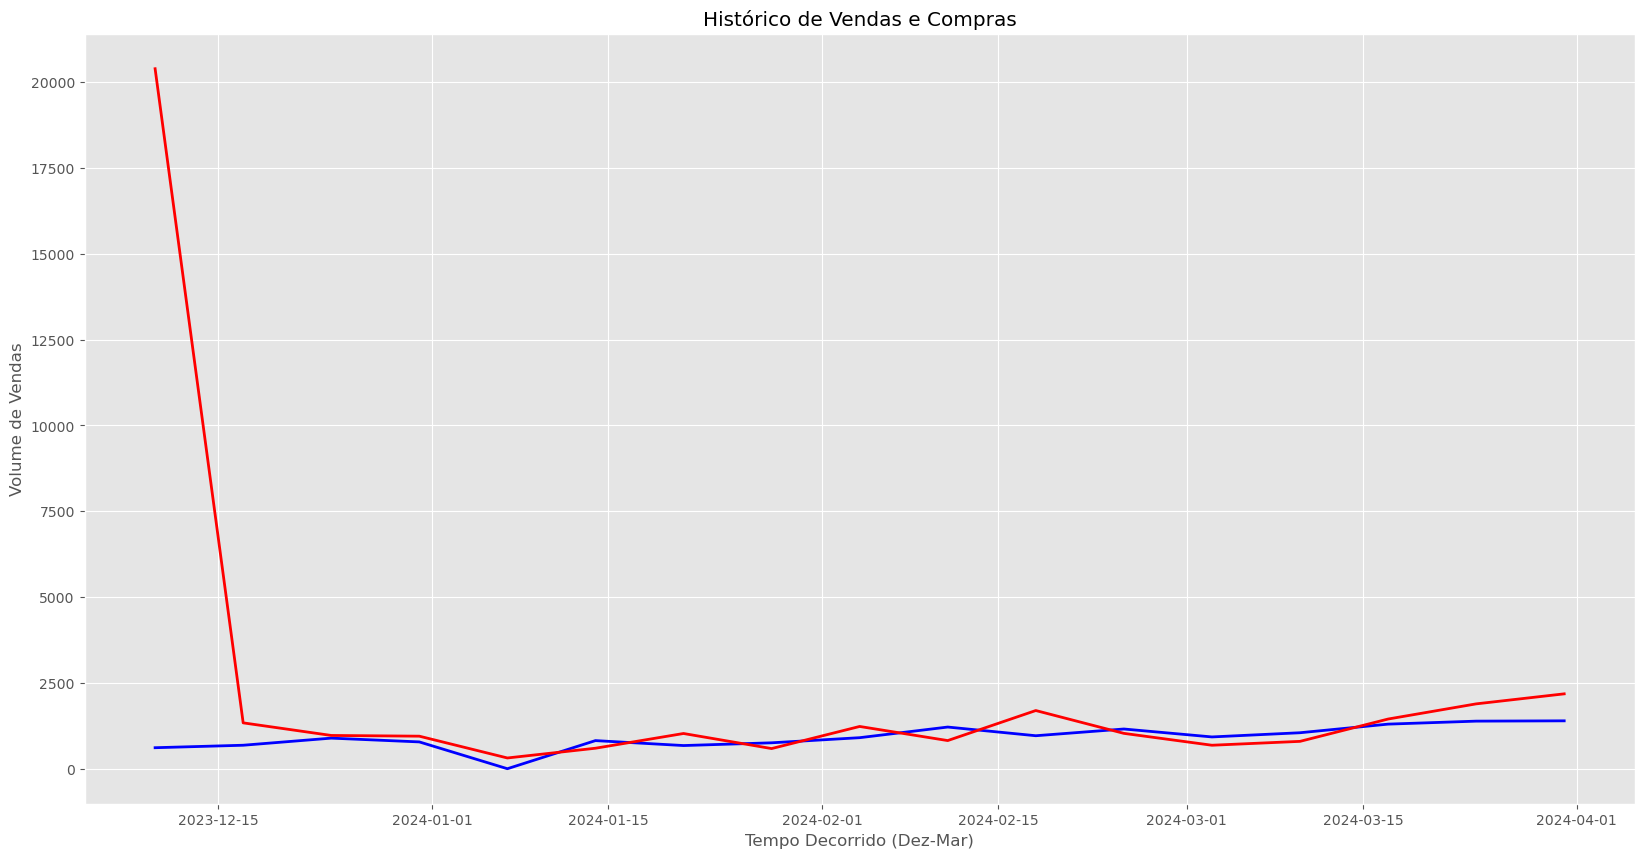

In [166]:
time = sales.index

buys = df[df['Flow'] == 'Produto'].groupby(pd.Grouper(freq='W'))['Amount'].sum()

plt.figure(figsize=(20, 10))

plt.plot(time, sales, color='blue',linewidth=2)

plt.plot(time, buys, color='red', linewidth=2)

plt.title('Histórico de Vendas e Compras')
plt.xlabel('Tempo Decorrido (Dez-Mar)')
plt.ylabel('Volume de Vendas')

plt.show()

In [167]:
products_sales = df.loc[df.Flow == "Venda"].groupby('Product').Amount.sum()
top_8_products_sales_vol = products_sales.sort_values(ascending=False)[:8].index
top_8_products = products_sales.sort_values(ascending=False)[:8]

print(top_8_products, top_8_products_sales_vol)

Product
Itaipava Latão          3827
Amstel Latão            1815
Heineken Latão           907
Coca Cola 2L             571
Spaten Latão             434
Heineken Long Neck       323
Império Branca Latão     310
Ice Off 275ml            304
Name: Amount, dtype: int64 Index(['Itaipava Latão', 'Amstel Latão', 'Heineken Latão', 'Coca Cola 2L',
       'Spaten Latão', 'Heineken Long Neck', 'Império Branca Latão',
       'Ice Off 275ml'],
      dtype='object', name='Product')


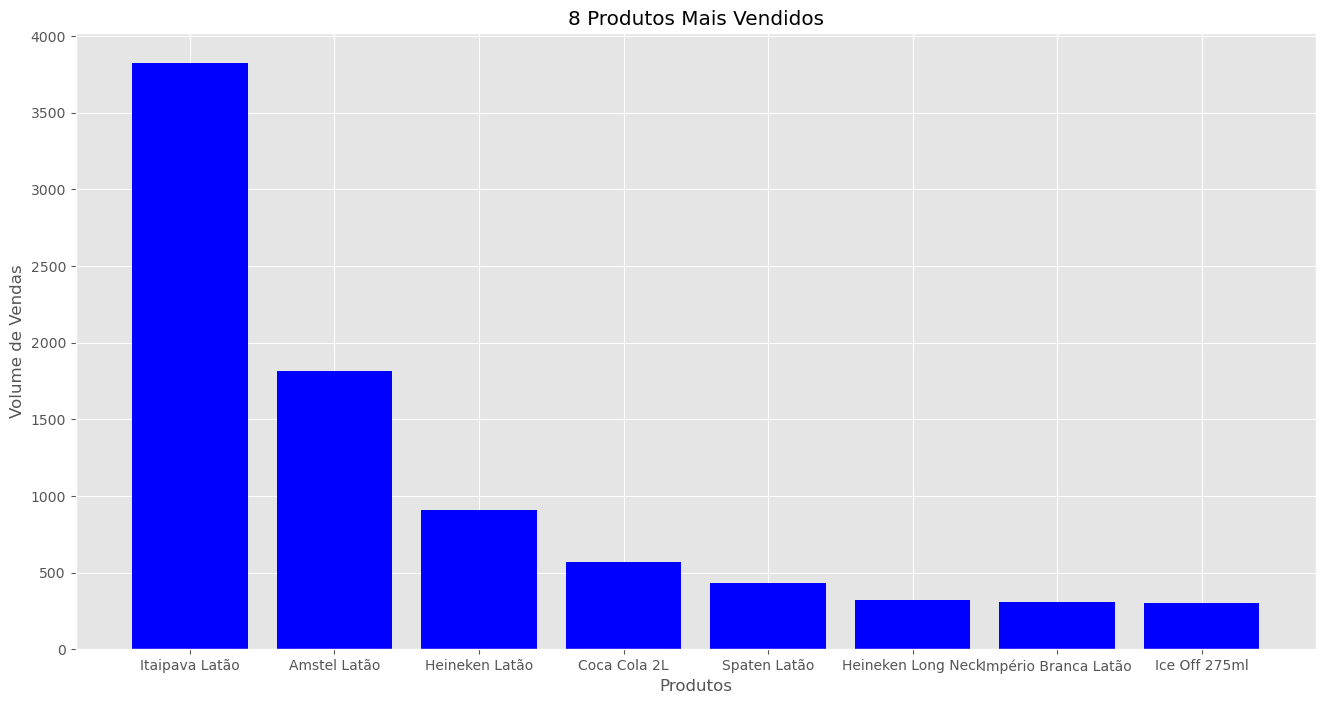

In [168]:
plt.figure(figsize=(16, 8))

plt.bar(top_8_products_sales_vol, top_8_products, color='blue')

plt.title('8 Produtos Mais Vendidos')
plt.xlabel('Produtos')
plt.ylabel('Volume de Vendas')

plt.show()

In [169]:
products_buys = df.loc[df.Flow == "Produto"].groupby('Product').Amount.sum()
top_8_products_buys_vol = products_buys.sort_values(ascending=False)[:8].index
top_8_products = products_buys.sort_values(ascending=False)[:8]

print(top_8_products, top_8_products_buys_vol)

Product
3 Amstel 473ml      10000
Cigarro (Varejo)    10000
Itaipava Latão       4096
Amstel Latão         1776
Heineken Latão        948
Coca Cola 2L          583
Spaten Latão          446
Itaipava 1L           372
Name: Amount, dtype: int64 Index(['3 Amstel 473ml', 'Cigarro (Varejo)', 'Itaipava Latão', 'Amstel Latão',
       'Heineken Latão', 'Coca Cola 2L', 'Spaten Latão', 'Itaipava 1L'],
      dtype='object', name='Product')


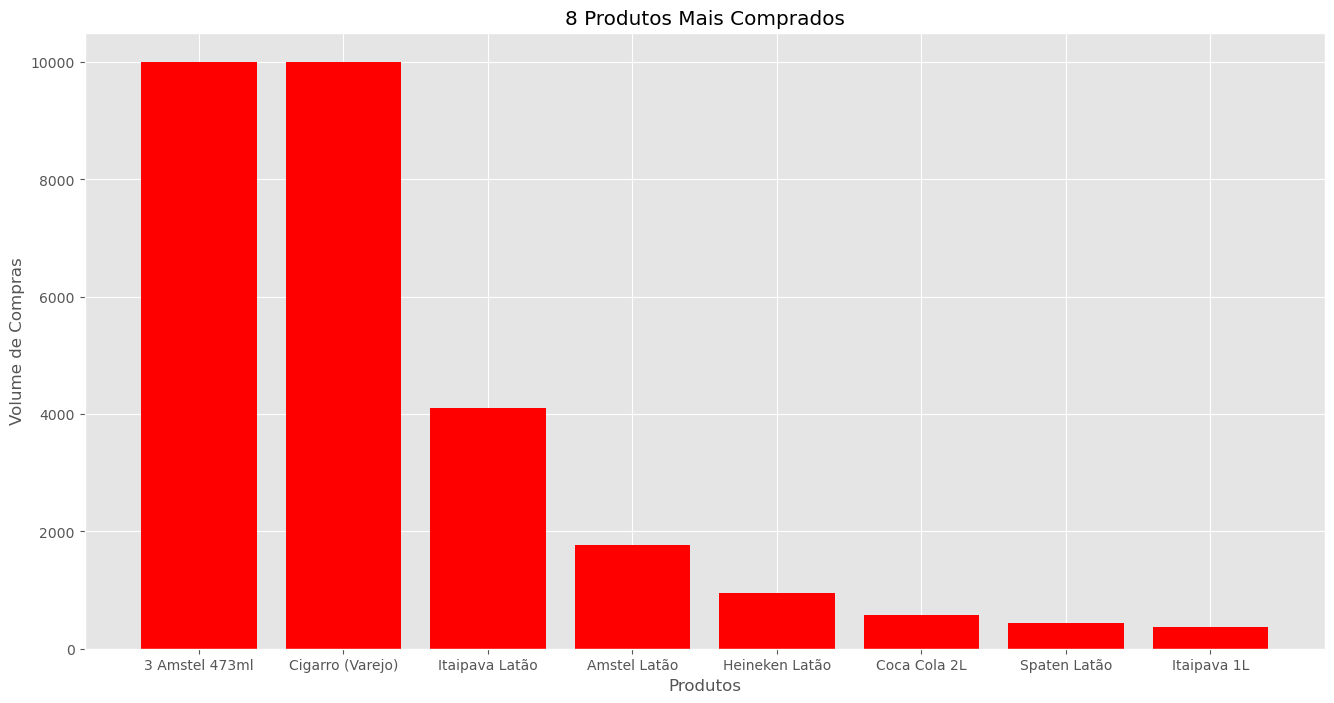

In [170]:
plt.figure(figsize=(16, 8))

plt.bar(top_8_products_buys_vol, top_8_products, color='red')

plt.title('8 Produtos Mais Comprados')
plt.xlabel('Produtos')
plt.ylabel('Volume de Compras')

plt.show()

In [171]:
import plotly.express as px
import pandas as pd

time = sales.index
buys = df[df['Flow'] == 'Produto'].groupby(pd.Grouper(freq='W'))['Amount'].sum()

fig = px.line()
fig.add_scatter(x=time, y=sales, mode='lines', name='Vendas', line=dict(color='blue', width=2))
fig.add_scatter(x=time, y=buys, mode='lines', name='Compras', line=dict(color='red', width=2))

fig.update_layout(
    title='Histórico de Vendas e Compras',
    xaxis_title='Tempo Decorrido (Dez-Mar)',
    yaxis_title='Volume de Vendas',
    width=1200,
    height=800,
    yaxis=dict(range=[-100, max(max(sales), max(buys))]) 
)

fig.show()


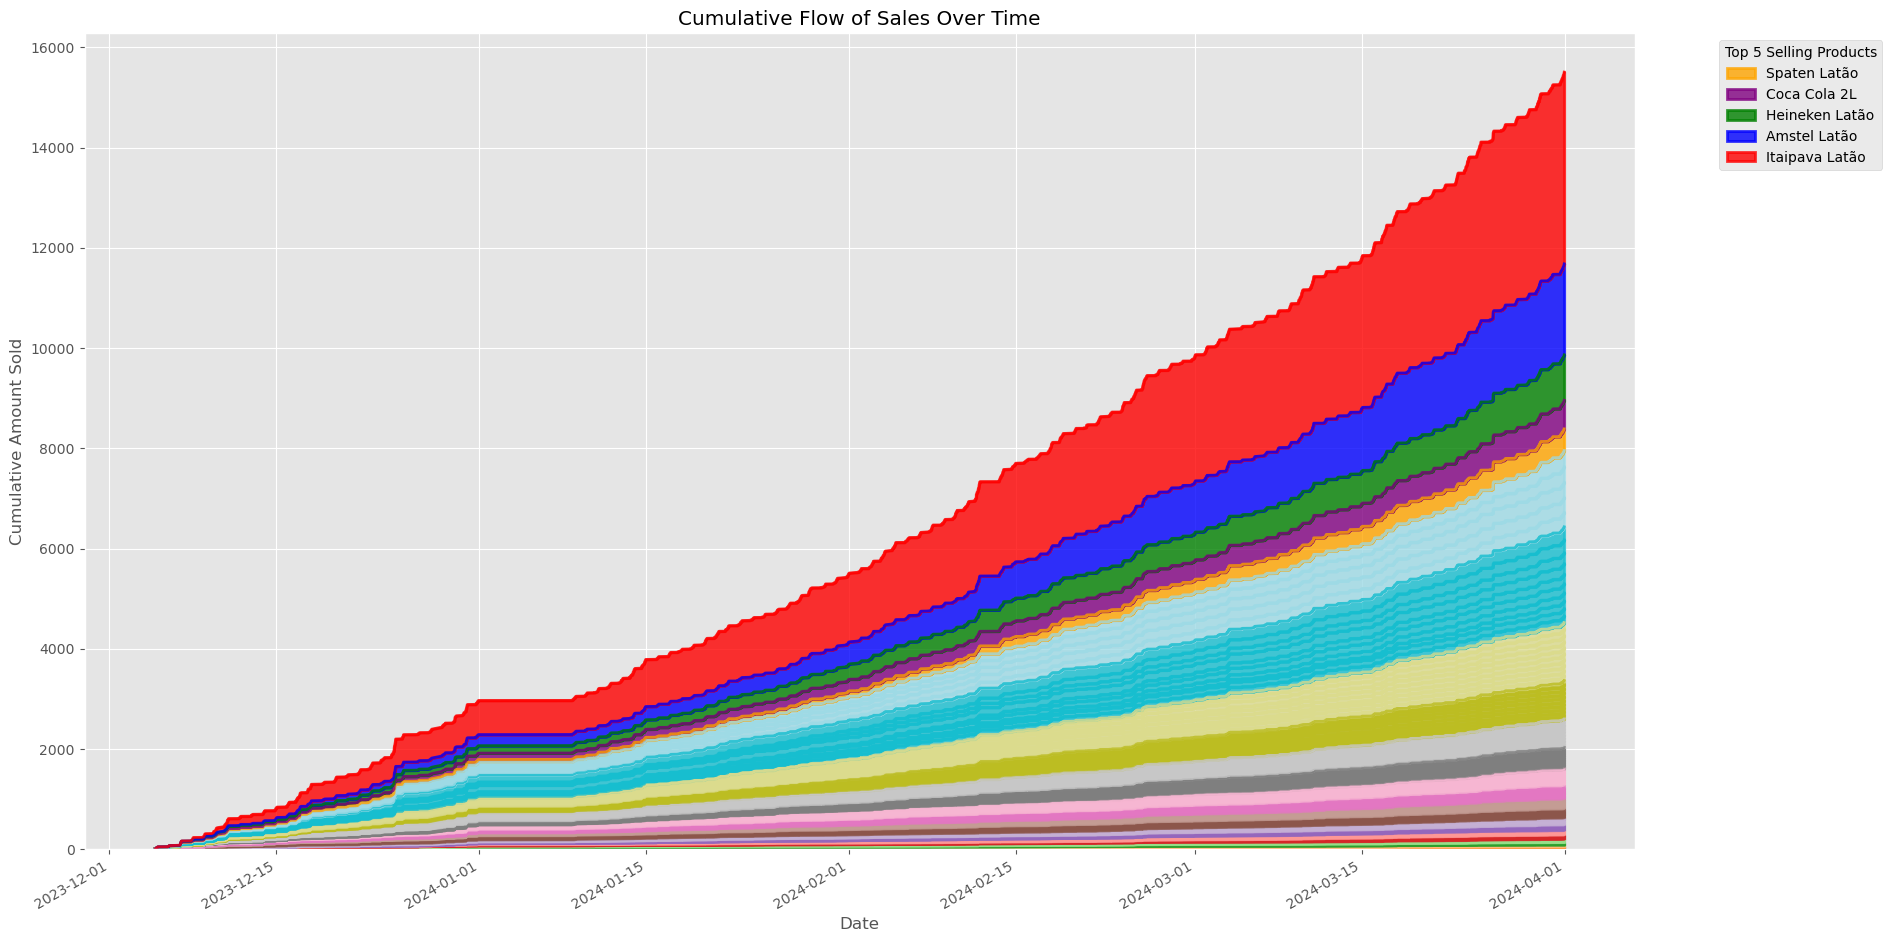

In [172]:
cumulative_df = df.loc[df.Flow == 'Venda'].pivot_table(index='Date', columns='Product', values='Amount', aggfunc='sum').cumsum()

cumulative_df.fillna(method='ffill', inplace=True)

last_row = cumulative_df.iloc[-1]

sorted_columns = last_row.sort_values(ascending=True).index.tolist()

cumulative_df = cumulative_df[sorted_columns]

cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, len(cumulative_df.columns)))

top_5_products = last_row.sort_values(ascending=False).index[:5]

color_dict = dict(zip(cumulative_df.columns, colors))


top_5_colors = ['red', 'blue', 'green', 'purple', 'orange']
for product, color in zip(top_5_products, top_5_colors):
    color_dict[product] = color


ax = cumulative_df.plot.area(stacked=True, figsize=(20, 12), linewidth=2, alpha=0.8, color=[color_dict[col] for col in cumulative_df.columns])

handles, labels = ax.get_legend_handles_labels()
top_5_handles = [h for h, label in zip(handles, labels) if label in top_5_products]
top_5_labels = [label for label in labels if label in top_5_products]
plt.legend(top_5_handles, top_5_labels, title='Top 5 Selling Products', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Cumulative Flow of Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Amount Sold')
plt.show()

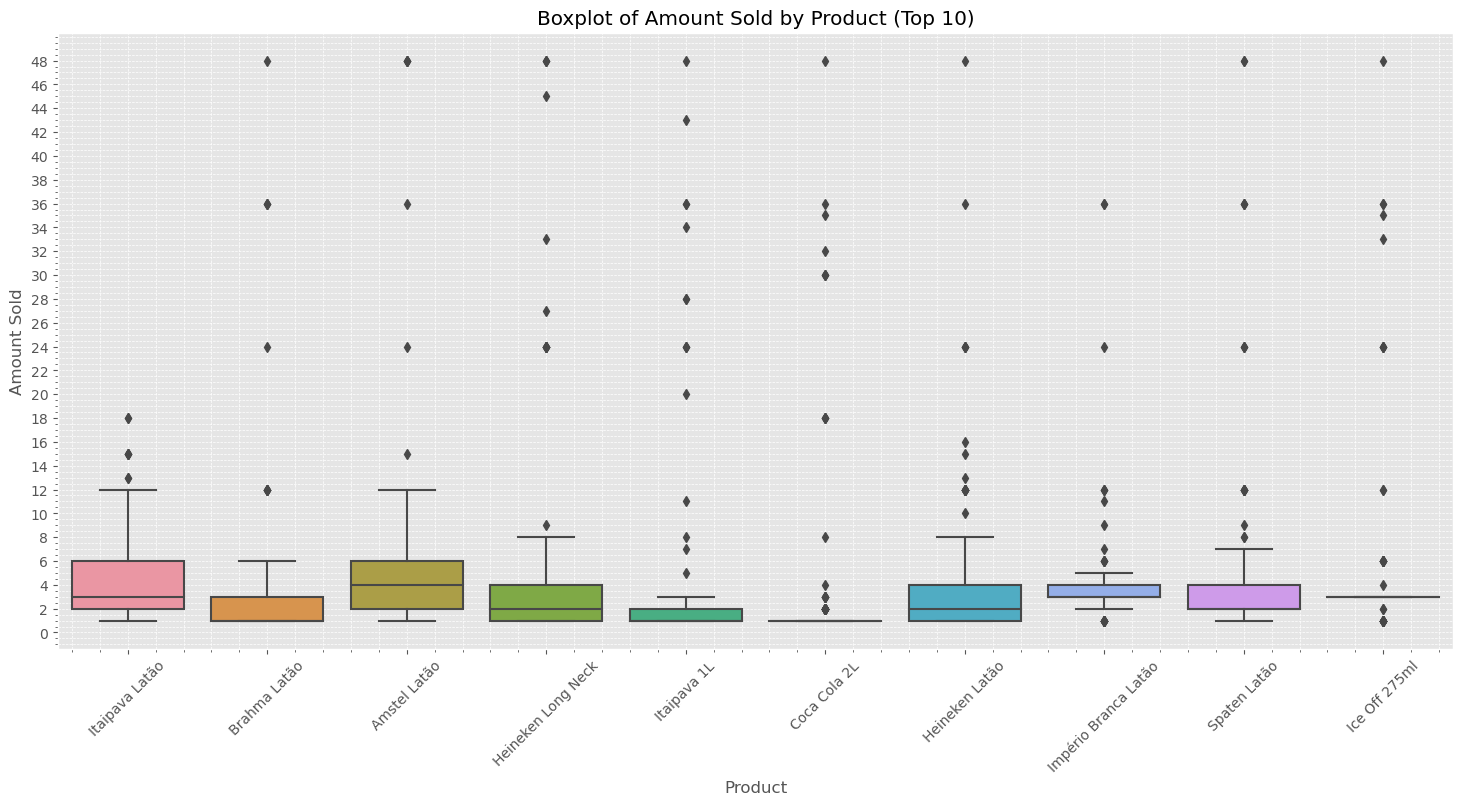

In [173]:
from scipy import stats
top_10_products = df.loc[df.Flow == "Venda"].groupby('Product').Amount.sum().nlargest(10).index
top_10_df = df[df['Product'].isin(top_10_products)]

z_scores = stats.zscore(top_10_df['Amount'])
threshold = 1
outliers = (np.abs(z_scores) > threshold)

top_10_df_no_outliers = top_10_df[~outliers]


plt.figure(figsize=(18, 8))
sns.boxplot(data=top_10_df_no_outliers, x='Product', y='Amount')
plt.title('Boxplot of Amount Sold by Product (Top 10)')
plt.xlabel('Product')
plt.ylabel('Amount Sold')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 50, 2))  
plt.minorticks_on() 
plt.grid(which='both', linestyle='--', linewidth=0.5)

plt.show()


In [174]:
df['Day_Week'] = df.index.day_name()
df.Day_Week.value_counts()

Day_Week
Sunday       1734
Saturday     1552
Friday       1212
Thursday     1005
Wednesday     966
Tuesday       931
Monday        654
Name: count, dtype: int64

In [175]:
df['Hour'] = df.index.hour
df.Hour.value_counts()

Hour
22    1091
23    1037
21    1010
0      787
20     743
19     551
15     488
16     482
18     443
17     412
1      382
14     375
13     113
2       80
3       42
12       8
10       6
11       3
4        1
Name: count, dtype: int64

In [176]:
df['Month'] = df.index.month
df.Month.value_counts()

Month
3     2692
2     2209
12    1715
1     1438
Name: count, dtype: int64

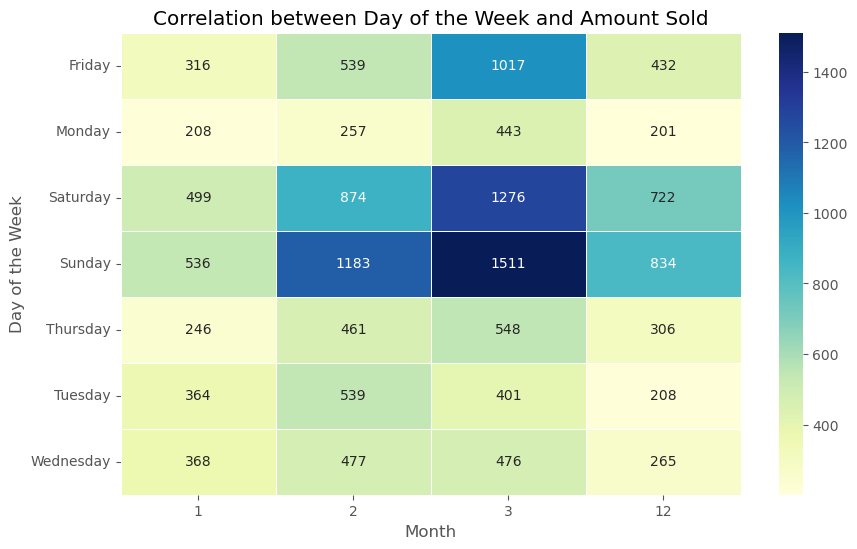

In [177]:
# Pivot the dataframe to get the total amount sold for each day of the week
heatmap_data = df.loc[df.Flow == 'Venda'].pivot_table(index='Day_Week', columns='Month', values='Amount', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=0.5)
plt.title('Correlation between Day of the Week and Amount Sold')
plt.xlabel('Month')
plt.ylabel('Day of the Week')
plt.show()


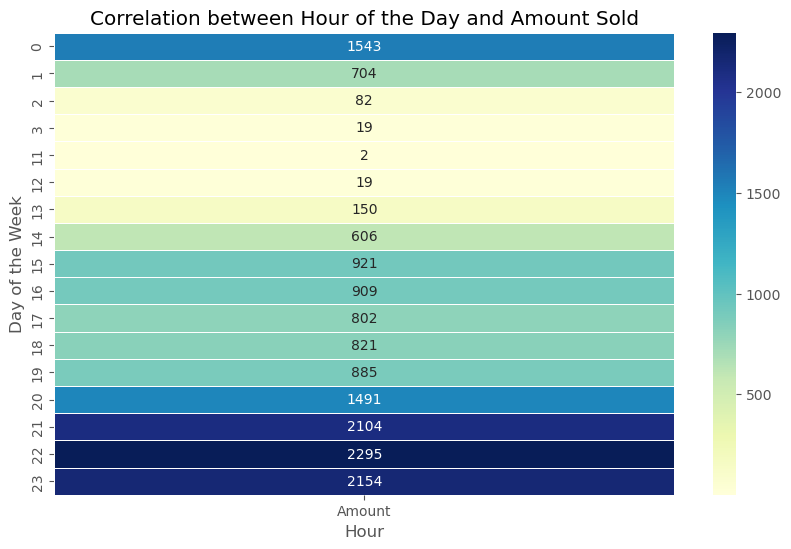

In [178]:
# Pivot the dataframe to get the total amount sold for each hour of the day
heatmap_data = df.loc[df.Flow == 'Venda'].pivot_table(index='Hour', values='Amount', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=0.5)
plt.title('Correlation between Hour of the Day and Amount Sold')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')
plt.show()


In [179]:
df['Is_Weekend'] = df['Day_Week'].isin(['Saturday', 'Sunday'])
df['Is_Weekend'] = df['Is_Weekend'].astype(int)
df['Is_Weekend'].value_counts()

Is_Weekend
0    4768
1    3286
Name: count, dtype: int64

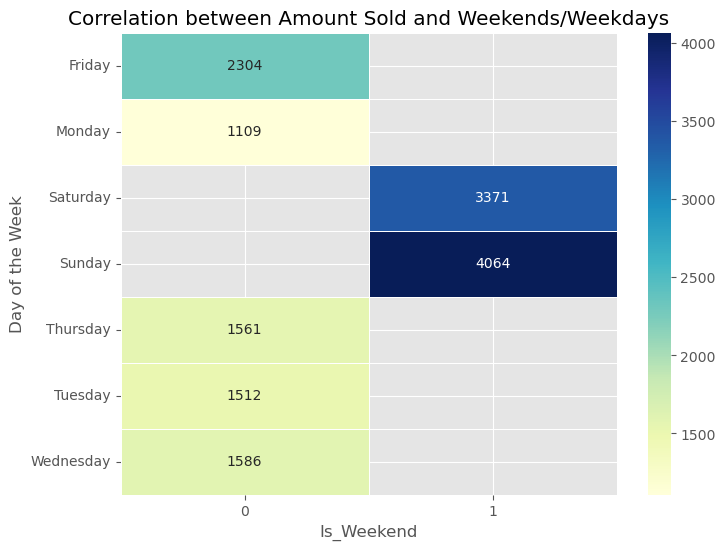

In [180]:
# Pivot the dataframe to get the total amount sold for each day of the week and weekend status
heatmap_data = df.loc[df.Flow == 'Venda'].pivot_table(index='Day_Week', columns='Is_Weekend', values='Amount', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=0.5)
plt.title('Correlation between Amount Sold and Weekends/Weekdays')
plt.xlabel('Is_Weekend')
plt.ylabel('Day of the Week')
plt.show()


<Axes: xlabel='Date'>

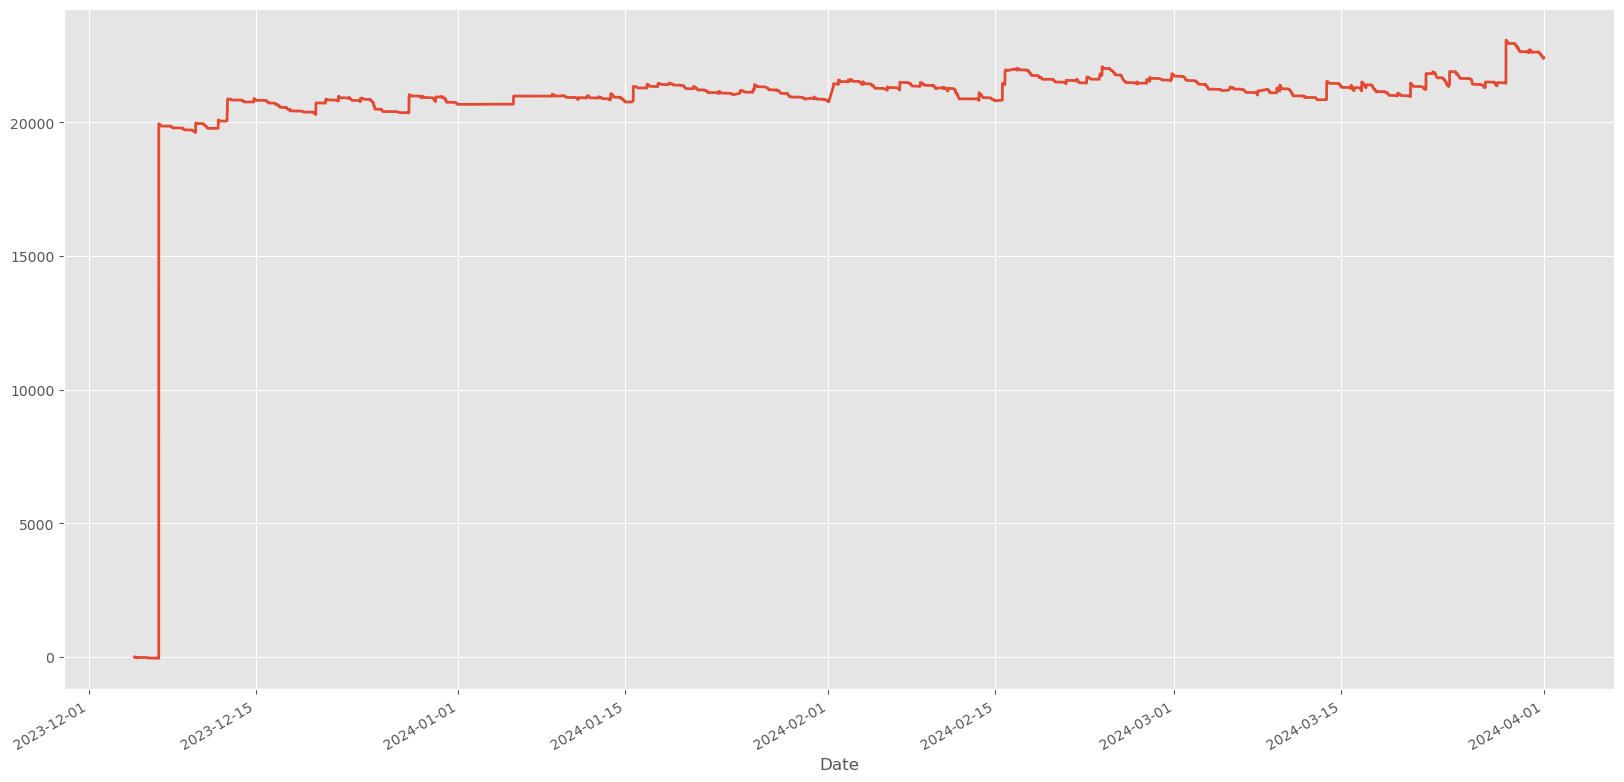

In [181]:
df['Sold'] = df.apply(lambda row: row['Amount'] if row['Flow'] == 'Venda' else 0, axis=1)
df['Bought'] = df.apply(lambda row: row['Amount'] if row['Flow'] == 'Produto' else 0, axis=1)

df['Balance'] = df['Bought'] - df['Sold']

df.Balance.cumsum().plot(figsize=(20, 10), linewidth=2)

In [182]:
weekday_vs_weekend_sales = df.groupby('Is_Weekend')[['Sold', 'Bought']].sum()
hourly_sales_trends = df.groupby('Hour')[['Sold', 'Bought']].sum()
seasonal_sales_trends = df.groupby('Month')[['Sold', 'Bought']].sum()
day_of_week_trends = df.groupby('Day_Week')[['Sold', 'Bought']].sum()

print("Weekday vs Weekend Sales:\n", weekday_vs_weekend_sales)
print("\nHourly Sales Trends:\n", hourly_sales_trends)
print("\nSeasonal Sales Trends:\n", seasonal_sales_trends)
print("\nDay of the Week Trends:\n", day_of_week_trends)

Weekday vs Weekend Sales:
             Sold  Bought
Is_Weekend              
0           8072   34544
1           7435    3396

Hourly Sales Trends:
       Sold  Bought
Hour              
0     1543     586
1      704     574
2       82    1099
3       19     778
4        0       1
10       0     680
11       2      10
12      19       1
13     150      96
14     606    2072
15     921    1143
16     909     722
17     802    1206
18     821     667
19     885    2349
20    1491   23744
21    2104     644
22    2295     301
23    2154    1267

Seasonal Sales Trends:
        Sold  Bought
Month              
1      2537    2639
2      4330    5314
3      5672    6344
12     2968   23643

Day of the Week Trends:
            Sold  Bought
Day_Week               
Friday     2304    2379
Monday     1109    1350
Saturday   3371    2368
Sunday     4064    1028
Thursday   1561    5339
Tuesday    1512    2080
Wednesday  1586   23396


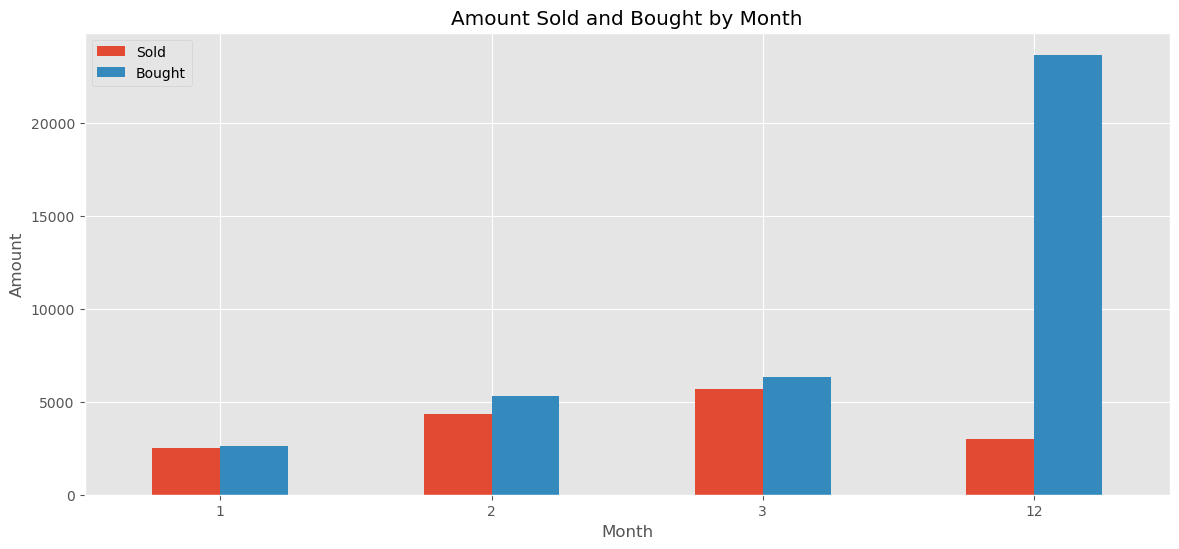

In [183]:
seasonal_sales_trends = df.groupby('Month')[['Sold', 'Bought']].sum()

seasonal_sales_trends.plot(kind='bar', figsize=(14, 6))
plt.title('Amount Sold and Bought by Month')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.legend(['Sold', 'Bought'])
plt.show()


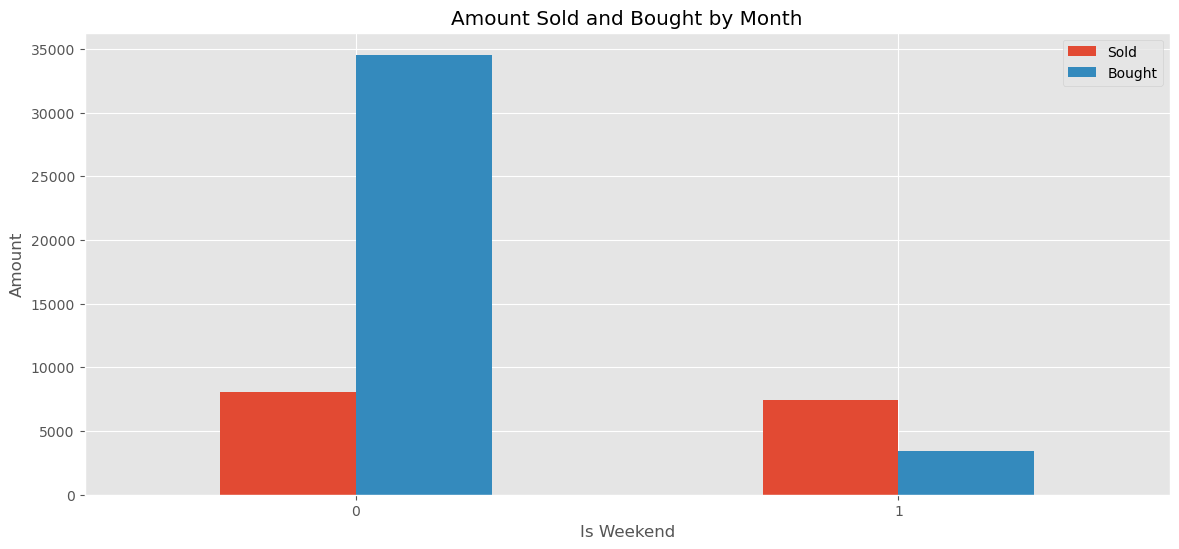

In [184]:
weekday_vs_weekend_sales = df.groupby('Is_Weekend')[['Sold', 'Bought']].sum()


weekday_vs_weekend_sales.plot(kind='bar', figsize=(14, 6))
plt.title('Amount Sold and Bought by Month')
plt.xlabel('Is Weekend')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.legend(['Sold', 'Bought'])
plt.show()


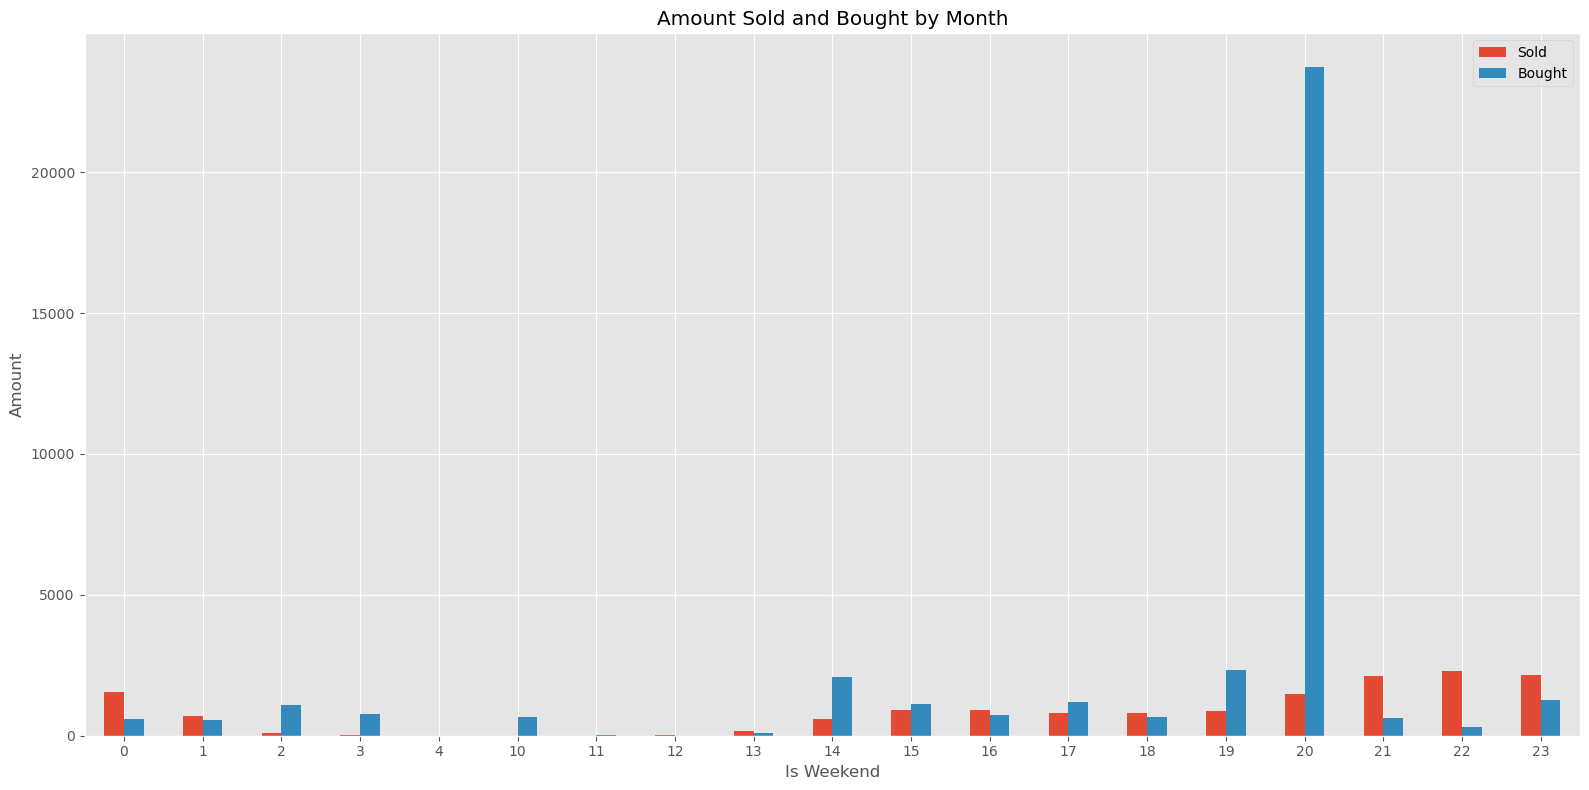

In [185]:
hourly_sales_trends = df.groupby('Hour')[['Sold', 'Bought']].sum()

hourly_sales_trends.plot(kind='bar', figsize=(16, 8))

plt.title('Amount Sold and Bought by Month')
plt.xlabel('Is Weekend')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.legend(['Sold', 'Bought'])
plt.tight_layout() 
plt.show()

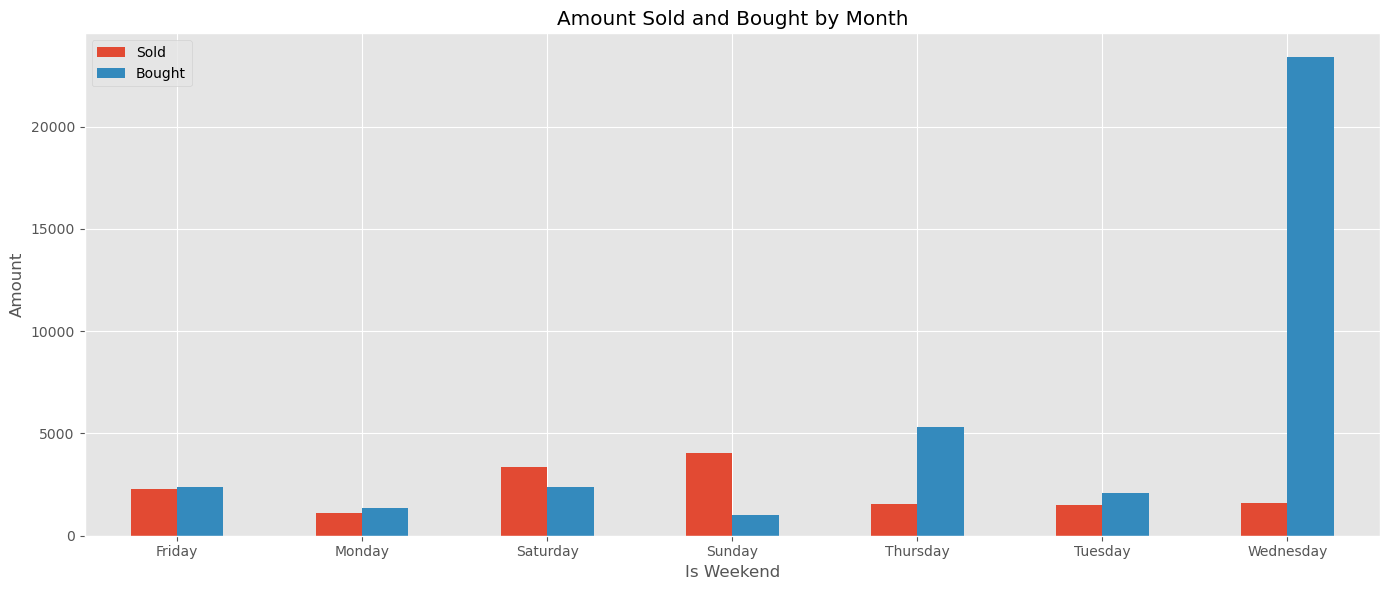

In [186]:
day_of_week_trends = df.groupby('Day_Week')[['Sold', 'Bought']].sum()

day_of_week_trends.plot(kind='bar', figsize=(14, 6))

plt.title('Amount Sold and Bought by Month')
plt.xlabel('Is Weekend')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.legend(['Sold', 'Bought'])
plt.tight_layout() 
plt.show()